<a href="https://colab.research.google.com/github/Sebas-Atehortua/Integracion-de-Datos-y-Prospectiva/blob/main/1_Caracterizaci%C3%B3n_VA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Gestión de Riesgo Operacional: Caso EVERGREEN**
En este espacio de trabajo se plantea como caso de estudio el análisis de los riesgos asociados a las operaciones del negocio de la naviera EVERGREEN. Esta naviera taiwanesa opera en 240 puertos alrededor del mundo utilizando 150 buques del Canal de Panamá.

Los riesgos operacionales a los cuales está expuesta la naviera están relacionados con la logística portuaria frente a la carga y descarga de contenedores. De esta manera, este riesgo operacional se describe a través de dos variables aleatorias que se conocen como:
* Frecuencia: Indica el número de contenedores que se quedan en tierra por semana (tiempo)
* Severidad (KUSD): Indica el costo de solucionar cada evento de riesgo.
* Distribución Agregada de Pérdidas: Producto entre la severidad y la frecuencia da como resultado la distribución agregada de las pérdidas (LDA - Loss Distribution Approach) y es precisamente que se hará la caracterización de esta distribución utilizando las medidas de tendencia central y las medidas de dispersión (coeficiente de asimetría, Kurtosis).


0. Cargar las librerías de trabajo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns # En esta librería se hará el trabajo estadístico
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se cargan los archivos de trabajo

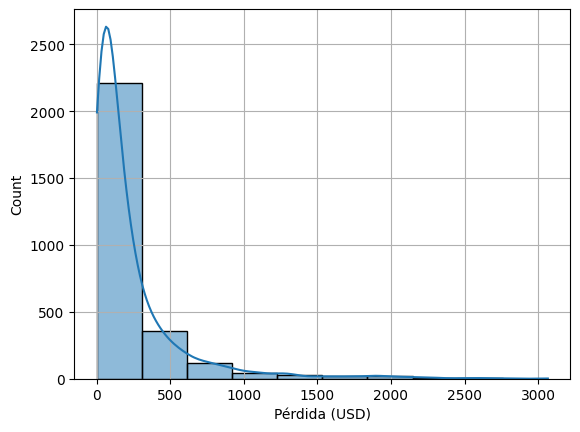

In [ ]:
nxl='/content/drive/MyDrive/Proyecto EVERGREEN/1. RiesgoOperacional_EVERGREEEN.xlsx'
XDB=pd.read_excel(nxl, sheet_name=0)
XDB.head(10)

# Procedemos con la construcción de la distribución agregada de las pérdidas
Freq=XDB.iloc[:,3]
Sev=XDB.iloc[:,4]
LDA=Freq*Sev

# Se procede con la construcción de la distribución agregada de las pérdidas

plt.figure()
sns.histplot(LDA, bins=10, kde=True)
plt.xlabel("Pérdida (USD)")
plt.grid()
plt.show()

2. Se procede con la clusterización estadística, la cual está definida mediante el Histograma de Frecuencias.

In [ ]:
np.set_printoptions(precision=2, suppress=True) # Para que no muestre en notación científica

NI=10 # Indicar el # de clústers

counts,bin_edges=np.histogram(LDA,bins=NI)
print("El número de datos por intervalo es:")
print(counts)
print("Los intervalos inferiores:")
print(bin_edges[:-1])
print("Los intervalos superiores:")
print(bin_edges[1:])
XC=(bin_edges[:-1]+bin_edges[1:])/2
print("Los intervalos centrales son:")
print(XC)

# Se configura la tabla


Tabla=np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts))
df=pd.DataFrame(Tabla,columns=['LI','LS','XC','ND'])
df.head(10)


El número de datos por intervalo es:
[2209  356  116   46   27   18   20    7    4    1]
Los intervalos inferiores:
[   2.6   308.93  615.26  921.59 1227.92 1534.25 1840.58 2146.91 2453.24
 2759.57]
Los intervalos superiores:
[ 308.93  615.26  921.59 1227.92 1534.25 1840.58 2146.91 2453.24 2759.57
 3065.9 ]
Los intervalos centrales son:
[ 155.76  462.09  768.42 1074.76 1381.09 1687.42 1993.75 2300.08 2606.41
 2912.74]


,LI,LS,XC,ND
0,2.599197,308.929450,155.764324,2209.0
1,308.929450,615.259703,462.094577,356.0
2,615.259703,921.589957,768.424830,116.0
3,921.589957,1227.920210,1074.755083,46.0
4,1227.920210,1534.250463,1381.085337,27.0
5,1534.250463,1840.580717,1687.415590,18.0
6,1840.580717,2146.910970,1993.745843,20.0
7,2146.910970,2453.241223,2300.076097,7.0
8,2453.241223,2759.571476,2606.406350,4.0
9,2759.571476,3065.901730,2912.736603,1.0


3. Se calculan las métricas estadística de Tendencia Central y Dispersión (media, desviación, asimetría y kurtosis)

In [ ]:
from scipy.stats import skew, kurtosis

# Se calculan las métricas estadísticas de tendencia:
u=np.mean(LDA)
var=np.var(LDA)
sigma=np.std(LDA)

# Asimetría y Kurtosis:
skewness_lda = skew(LDA)
kurtosis_lda = kurtosis(LDA)

# Crear un DataFrame con todos los estadísticos
df2=pd.DataFrame({
    'Media': [u],
    'Varianza': [var],
    'Desviación': [sigma],
    'Asimetría': [skewness_lda],
    'Curtosis': [kurtosis_lda]
})

df2.head(1)

,Media,Varianza,Desviación,Asimetría,Curtosis
0,231.266602,115581.511672,339.97281,3.389058,14.577132


In [ ]:
from scipy.stats import skew, kurtosis

# Calculamos la asimetría (skewness)
skewness_lda = skew(LDA)

# Calculamos la curtosis (kurtosis)
kurtosis_lda = kurtosis(LDA)

# Creamos un DataFrame para mostrar los resultados
df_stats_advanced = pd.DataFrame({
    'Asimetría (Skewness)': [skewness_lda],
    'Curtosis (Kurtosis)': [kurtosis_lda]
})

display(df_stats_advanced)

,Asimetría (Skewness),Curtosis (Kurtosis)
0,3.389058,14.577132


**Análisis de Resultados**
De las métricas de MTC y dispersión podemos observar que los datos tienen la tendencia a ubicarse por debao de la media como lo muestra el cofeiciente de asimetría (3.3890), el cual está por encima de la unidad, lo que indica que en general las pérdidas por dejar contenedores en tierra son pérdidas menores (pérdidas esperadaas no asegurables). Por su parte el coef. de Kurtosis muestra que los datos se encuentran muy concentrados al lado derecho de la media de la distribución de las pérdidas, tal y como se puede observar en la gráfica del histograma de frecuencias. Esto refuerza la idea de menores pérdidas.